# Load the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Boston Airbnb Open Data/listings.csv'

data = pd.read_csv(file_path)
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


# Overview of Dataset

In [2]:
data.shape

(3585, 95)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

The dataset has both categorical (object) and numerical (float64, int64) columns. Furthermore, it consist of 94 columns. We can also observe that the dataset seems to contain features with all null values (0 non-null). These columns should be removed because they contribute no information to the regression model. Moreover, we should try to remove as much redundant variables as possible during data cleaning because there is a total of 94 variables. There are a lot of variables to say the least.

In [4]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


The numerical summary provides key statistics for each numerical feature, including count, mean, standard deviation, minimum, maximum, and quartiles (25th, 50th, and 75th percentiles). These metrics help to understand the data’s central tendency, spread, and distribution.

In [5]:
data.describe(include='object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3585,3442,2528,3585,3585,2170,1610,2295,...,3585,3585,3585,2829,2829,3585,3585,3585,3585,3585
unique,3585,1,3504,3113,2268,3423,1,1728,1269,1859,...,51,38,1,975,404,1,2,4,2,2
top,https://www.airbnb.com/rooms/12147973,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,"The unit is stylishly designed for comfort, va...",none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...",...,$0.00,today,2016-09-06,2016-04-05,2016-09-05,f,f,strict,f,f
freq,1,3585,8,21,17,7,3585,21,44,26,...,2211,833,3585,23,118,3585,2991,1582,3518,3348


The categorical summary gives insights into non-numeric variables by showing the count of valid entries, the number of unique categories, the most frequent category, and its frequency. This helps identify data imbalances and potential influences on further analysis or model development. From the summary, we can deduce that there are object columns with only 1 unique, meaning these columns only contain 1 repeating value for all records. These columns are redundant since they do not provide any information to contribute for the regression model. Therefore, these columns should be removed.

In [6]:
# Find columns with object data type that have only 1 unique value
object_columns = data.select_dtypes(include='object')  # Filter for object columns
single_unique_value_columns = object_columns.columns[object_columns.nunique() == 1]

# Display the columns with only one unique value
print("Columns with only one unique value:")
print(single_unique_value_columns)


Columns with only one unique value:
Index(['last_scraped', 'experiences_offered', 'state', 'country_code',
       'country', 'calendar_last_scraped', 'requires_license'],
      dtype='object')


The code above filters out the columns with only 1 unique value and prints them out. Therefore, there is a total of 7 constant columns.

# Data Cleaning

In [7]:
# List of unnecessary features to drop
unnecessary_features = [
    # Identifiers and URLs
    'id', 'listing_url', 'scrape_id', 'last_scraped',
    'picture_url', 'thumbnail_url', 'medium_url', 'xl_picture_url',
    'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url',

    # Textual Descriptions
    'name', 'summary', 'space', 'description', 'neighborhood_overview',
    'notes', 'transit', 'access', 'interaction', 'house_rules', 'requires_license', 
    'require_guest_profile_picture', 'require_guest_phone_verification',

    # Constant or Nearly Constant Features
    'experiences_offered', 'neighbourhood_group_cleansed', 'has_availability',
    'license', 'jurisdiction_names', 'country', 'state', 'country_code', 'smart_location',

    # Highly Missing Features
    'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',

    # Review Date Features
    'first_review', 'last_review', 'reviews_per_month', 'number_of_reviews', 
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',

    # Host Details
    'host_name', 'host_has_profile_pic', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
    'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count',
    'host_neighbourhood', 'host_since', 'host_verifications', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',

    # Calendar and Availability Features
    'calendar_updated', 'calendar_last_scraped', 'availability_30', 'availability_60', 'availability_90', 'availability_365'
]

print("Number of unnecessary features:", len(unnecessary_features))

data_cleaned = data.copy()

# Drop the unnecessary features from the dataset
data_cleaned = data_cleaned.drop(columns=unnecessary_features, errors='ignore')

print("Shape of the cleaned dataset:", data_cleaned.shape)

Number of unnecessary features: 71
Shape of the cleaned dataset: (3585, 24)


The features above are all the unnecessary features.

After removing these features, we are left with 24 variables (columns) and 3585 data records (rows). The smaller and cleaner dataset makes it easier to perform exploratory data analysis (EDA). However, we should first apply missing and duplicate value handling before performing EDA.

In [8]:
missing_values = data_cleaned.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
street                      0
neighbourhood             543
neighbourhood_cleansed      0
city                        2
zipcode                    38
market                     14
latitude                    0
longitude                   0
is_location_exact           0
property_type               3
room_type                   0
accommodates                0
bathrooms                  14
bedrooms                   10
beds                        9
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
instant_bookable            0
cancellation_policy         0
dtype: int64


Using the isnull().sum() command, we found out that there are multiple null values in the dataset. The number of missing null values of each column are listed above. Columns: 'neighbourhood', 'city', 'zipcode', 'market', 'property_type', 'bathrooms', 'bedrooms', and 'beds' contains missing values. We chose to handle the missing values accordingly.

In [9]:
# Group by 'room_type' and fill missing values of columns: 'bathrooms', 'bedrooms', and 'beds' with their respective modes
data_cleaned['bathrooms'] = data_cleaned.groupby('room_type')['bathrooms'].transform(lambda x: x.fillna(x.mode()[0]))
data_cleaned['bedrooms'] = data_cleaned.groupby('room_type')['bedrooms'].transform(lambda x: x.fillna(x.mode()[0]))
data_cleaned['beds'] = data_cleaned.groupby('room_type')['beds'].transform(lambda x: x.fillna(x.mode()[0]))

# Impute these columns with mode (without inplace=True)
data_cleaned['neighbourhood'] = data_cleaned['neighbourhood'].fillna(data_cleaned['neighbourhood'].mode()[0])
data_cleaned['city'] = data_cleaned['city'].fillna(data_cleaned['city'].mode()[0])
data_cleaned['zipcode'] = data_cleaned['zipcode'].fillna(data_cleaned['zipcode'].mode()[0])
data_cleaned['market'] = data_cleaned['market'].fillna(data_cleaned['market'].mode()[0])
data_cleaned['property_type'] = data_cleaned['property_type'].fillna(data_cleaned['property_type'].mode()[0])

# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values per column (after fillna):")
print(missing_values)


Missing values per column (after fillna):
street                    0
neighbourhood             0
neighbourhood_cleansed    0
city                      0
zipcode                   0
market                    0
latitude                  0
longitude                 0
is_location_exact         0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
amenities                 0
price                     0
guests_included           0
extra_people              0
minimum_nights            0
maximum_nights            0
instant_bookable          0
cancellation_policy       0
dtype: int64


Missing values are imputed by mode, the most frequent value within a column. For categorical columns like neighbourhood, city, zipcode, market, and property_type, this makes the imputations consistent with the majority category; for bathrooms, bedrooms, and beds, imputation by group allows the imputation of the modal value in each room type, which maintains consistency in context. This could be an effective way of filling in missing data without affecting the integrity of the dataset further in analyses or modeling.

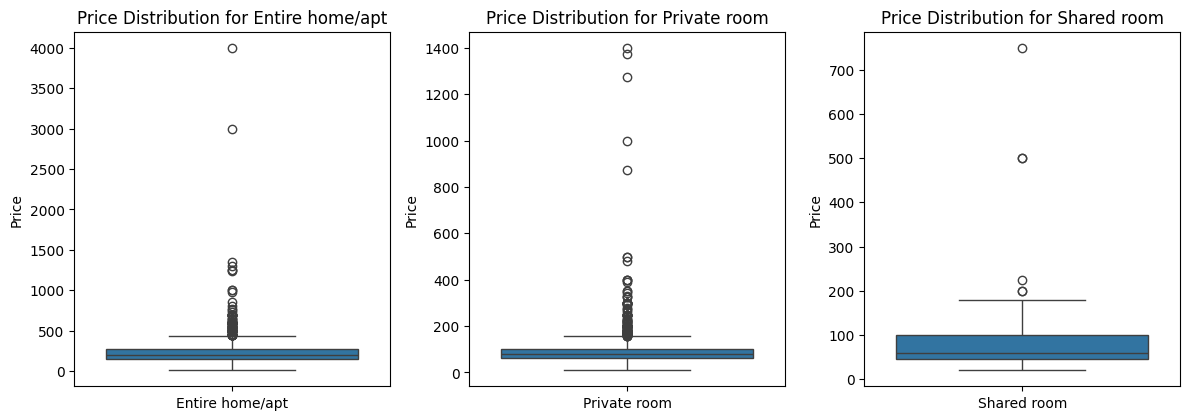

In [10]:
data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)
room_types = data_cleaned['room_type'].unique()

plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    plt.subplot(2, 3, i)  # Adjust the grid size based on the number of room types
    sns.boxplot(data=data_cleaned[data_cleaned['room_type'] == room_type], x='room_type', y='price')
    plt.title(f'Price Distribution for {room_type}')
    plt.xlabel('')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

A boxplot of the distribution of price against room_type gives insight into how the price varies across different types of rooms: Entire home/apt, Private room, and Shared room. This will help in finding the outliers, central tendency, and dispersion of data for each of the room types. From the boxplot, we can observe that the median (Q2) of Entire home/apt, Private room, and Shared room are approximately 250, 90, and 60 respectively. In addition, the typical range of Entire home/apt, Private room, and Shared room are approximately 0 to 500, 0 to 200, and 10 to 190 respectively. Therefore, Entire home/apt has the largest range in room_type. We can also conclude that room_type significantly influences price. There are also outliers in each room_type with Entire home/apt having more extreme outliers and Shared room having the least extreme and fewest outliers. 

In [11]:
def remove_outliers_iqr(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower_bound) & (group['price'] <= upper_bound)]

# Group by 'room_type' and apply the remove_outliers_iqr function
data_cleaned = data_cleaned.groupby('room_type', group_keys=False).apply(remove_outliers_iqr)

# Reset the index
data_cleaned.reset_index(drop=True, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_39648\3781258083.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('room_type', group_keys=False).apply(remove_outliers_iqr)


To handle the outliers, we chose remove outliers in the 'price' column for each room type. This uses the IQR method to calculate, for each room type, the range of IQRs, defines outliers as those values that lie outside a factor of 1.5 times the IQR from the first and third quartile, and then removes them. Then, utilize the apply() function to every group of room types. This gaurantees that for each room type, the removal of outliers is done separately. Finally, reset the index to ensure a clean and sequential index of the cleaned dataset. This helps make sure that extreme values don't distort the analysis while maintaining the integrity of your data. 

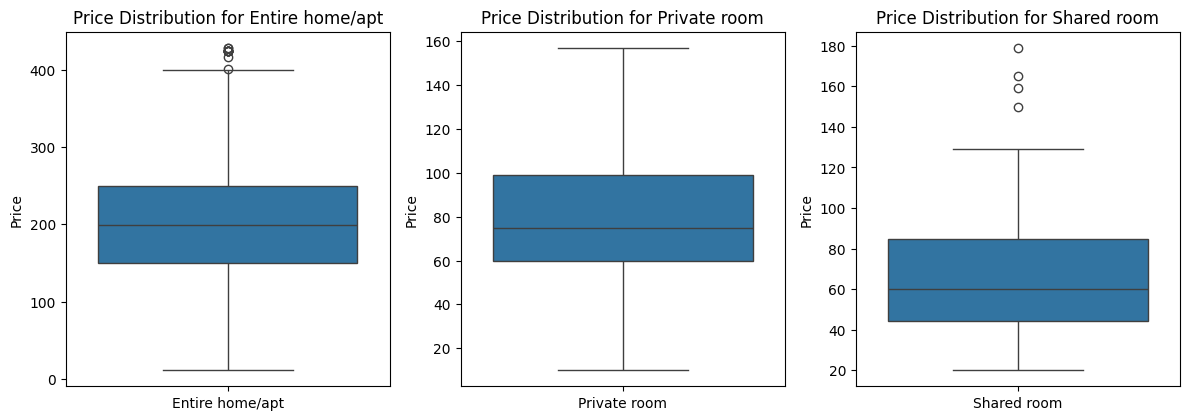

In [12]:

# Set up the figure
plt.figure(figsize=(12, 8))

# Iterate through the room types and plot individually
for i, room_type in enumerate(room_types, start=1):
    plt.subplot(2, 3, i)  # Adjust the grid size based on the number of room types
    sns.boxplot(data=data_cleaned[data_cleaned['room_type'] == room_type], x='room_type', y='price')
    plt.title(f'Price Distribution for {room_type}')
    plt.xlabel('')
    plt.ylabel('Price')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


Above are the boxplot for each room_type. As you can see most outliers are removed, which is leading to a better distribution of prices across the room_type. By using the IQR in filtering out such points, the boxplots better describe more realistic ranges in prices, and further enable us to analyze the dataset and make future models based on un-skewed and incorrect values.

To remove duplicates, we first check if there are any duplicated rows in the cleaned data to be removed.

In [13]:
data_cleaned.duplicated().sum()

0

Since the sum of all duplicated rows is 0, that means there are no duplicates, so there is no need to remove them.

# Data Transformation

## Data Encoding

The first part of data transformation is data encoding, which involves converting categorical data to numerical values. Since all of the properties are located in Boston, the only fields that need to be encoded are property_type, bed_type, amenities, instant_bookable, and cancellation_policy. For all the fields except amenities, we can use label encoding. Below shows the dataframe before encoding:

In [14]:
data_cleaned.head()

,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.282619,-71.133068,t,House,...,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,1,$0.00,2,1125,f,moderate
1,"Kittredge Street, Boston, MA 02131, United States",Allston-Brighton,Roslindale,Boston,02131,Boston,42.281390,-71.131190,f,Apartment,...,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",100.0,1,$25.00,1,1125,f,strict
2,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.288820,-71.139510,t,Apartment,...,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",229.0,4,$25.00,4,10,f,strict
3,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,San Francisco,42.291723,-71.131556,t,Condominium,...,2.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air Condition...",93.0,1,$0.00,1,1125,t,flexible
4,"Fairview Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.287641,-71.129883,t,Apartment,...,3.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",150.0,5,$30.00,2,21,f,moderate


Now, we use label encoding to encode property_type, bed_type, instant_bookable, and cancellation_policy.

In [15]:
from sklearn import preprocessing

data_encoded = data_cleaned.copy()

label_encoder = preprocessing.LabelEncoder()
data_encoded["property_type"] = label_encoder.fit_transform(data_encoded["property_type"])
data_encoded["bed_type"] = label_encoder.fit_transform(data_encoded["bed_type"])
data_encoded["instant_bookable"] = label_encoder.fit_transform(data_encoded["instant_bookable"])
data_encoded["cancellation_policy"] = label_encoder.fit_transform(data_encoded["cancellation_policy"])

After using label encoding for all of the fields except amenities, we have the dataframe below:

In [16]:
data_encoded.head()

,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.282619,-71.133068,t,8,...,3.0,4,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,1,$0.00,2,1125,0,1
1,"Kittredge Street, Boston, MA 02131, United States",Allston-Brighton,Roslindale,Boston,02131,Boston,42.281390,-71.131190,f,0,...,2.0,4,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",100.0,1,$25.00,1,1125,0,2
2,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.288820,-71.139510,t,0,...,2.0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",229.0,4,$25.00,4,10,0,2
3,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,San Francisco,42.291723,-71.131556,t,4,...,2.0,4,"{""Cable TV"",""Wireless Internet"",""Air Condition...",93.0,1,$0.00,1,1125,1,0
4,"Fairview Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.287641,-71.129883,t,0,...,3.0,4,"{TV,Internet,""Wireless Internet"",""Air Conditio...",150.0,5,$30.00,2,21,0,1


Since the amenities field consists of lists rather than individual values, the simple label encoding method used for the other fields is not suitable. First, we have to actually convert the string of data into a list, which can be done using a lambda function as below:

In [17]:
data_encoded['amenities'] = data_encoded.amenities.apply(lambda x: x[1:-1].split(','))

In [18]:
data_encoded['amenities']

0       [TV, "Wireless Internet", Kitchen, "Free Parki...
1       [TV, Internet, "Wireless Internet", Kitchen, "...
2       [TV, "Cable TV", Internet, "Wireless Internet"...
3       ["Cable TV", "Wireless Internet", "Air Conditi...
4       [TV, Internet, "Wireless Internet", "Air Condi...
                              ...                        
3357    [TV, "Cable TV", Internet, "Wireless Internet"...
3358                                                   []
3359    ["Wireless Internet", "Pets live on this prope...
3360    ["Wireless Internet", Kitchen, Essentials, "tr...
3361    [TV, Internet, "Wireless Internet", "Air Condi...
Name: amenities, Length: 3362, dtype: object

In [19]:
import itertools
import numpy as np

np.unique([*itertools.chain.from_iterable(data_encoded.amenities)])

array(['', '"24-Hour Check-in"', '"Air Conditioning"',
       '"Buzzer/Wireless Intercom"', '"Cable TV"',
       '"Carbon Monoxide Detector"', '"Elevator in Building"',
       '"Family/Kid Friendly"', '"Fire Extinguisher"', '"First Aid Kit"',
       '"Free Parking on Premises"', '"Free Parking on Street"',
       '"Hair Dryer"', '"Hot Tub"', '"Indoor Fireplace"',
       '"Laptop Friendly Workspace"', '"Lock on Bedroom Door"',
       '"Other pet(s)"', '"Paid Parking Off Premises"', '"Pets Allowed"',
       '"Pets live on this property"', '"Safety Card"',
       '"Smoke Detector"', '"Smoking Allowed"', '"Suitable for Events"',
       '"Washer / Dryer"', '"Wheelchair Accessible"',
       '"Wireless Internet"',
       '"translation missing: en.hosting_amenity_49"',
       '"translation missing: en.hosting_amenity_50"', 'Breakfast',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Essentials', 'Gym',
       'Hangers', 'Heating', 'Internet', 'Iron', 'Kitchen', 'Pool',
       'Shampoo', 'TV', 

If we check for the unique values in throughout the amenities column, we will find that there are two invalid values - "translation missing: en.hosting_amenity_49" and "translation missing: en.hosting_amenity_50". These two values must be removed from all columns as below:

In [20]:
data_encoded['amenities'] = data_encoded['amenities'].apply(
    lambda row: [val for val in row if val != '"translation missing: en.hosting_amenity_49"']
)
data_encoded['amenities'] = data_encoded['amenities'].apply(
    lambda row: [val for val in row if val != '"translation missing: en.hosting_amenity_50"']
)

In [21]:
np.unique([*itertools.chain.from_iterable(data_encoded.amenities)])

array(['', '"24-Hour Check-in"', '"Air Conditioning"',
       '"Buzzer/Wireless Intercom"', '"Cable TV"',
       '"Carbon Monoxide Detector"', '"Elevator in Building"',
       '"Family/Kid Friendly"', '"Fire Extinguisher"', '"First Aid Kit"',
       '"Free Parking on Premises"', '"Free Parking on Street"',
       '"Hair Dryer"', '"Hot Tub"', '"Indoor Fireplace"',
       '"Laptop Friendly Workspace"', '"Lock on Bedroom Door"',
       '"Other pet(s)"', '"Paid Parking Off Premises"', '"Pets Allowed"',
       '"Pets live on this property"', '"Safety Card"',
       '"Smoke Detector"', '"Smoking Allowed"', '"Suitable for Events"',
       '"Washer / Dryer"', '"Wheelchair Accessible"',
       '"Wireless Internet"', 'Breakfast', 'Cat(s)', 'Dog(s)', 'Doorman',
       'Dryer', 'Essentials', 'Gym', 'Hangers', 'Heating', 'Internet',
       'Iron', 'Kitchen', 'Pool', 'Shampoo', 'TV', 'Washer'], dtype='<U28')

In [22]:
unique_amenities = data_encoded['amenities'].explode()
unique_amenities[:] = unique_amenities.factorize()[0]
data_encoded['amenities'] = unique_amenities.groupby(level=0).agg(list)

In [23]:
data_encoded.head()

,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.282619,-71.133068,t,8,...,3.0,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",250.0,1,$0.00,2,1125,0,1
1,"Kittredge Street, Boston, MA 02131, United States",Allston-Brighton,Roslindale,Boston,02131,Boston,42.281390,-71.131190,f,0,...,2.0,4,"[0, 15, 1, 2, 3, 6, 10, 16, 17, 11, 12, 13, 18]",100.0,1,$25.00,1,1125,0,2
2,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.288820,-71.139510,t,0,...,2.0,4,"[0, 19, 15, 1, 20, 2, 3, 6, 7, 8, 9, 10, 16, 1...",229.0,4,$25.00,4,10,0,2
3,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,San Francisco,42.291723,-71.131556,t,4,...,2.0,4,"[19, 1, 20, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...",93.0,1,$0.00,1,1125,1,0
4,"Fairview Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.287641,-71.129883,t,0,...,3.0,4,"[0, 15, 1, 20, 2, 3, 6, 7, 10, 16, 17, 24, 11,...",150.0,5,$30.00,2,21,0,1


As you can see, we have successfully encoded all the necessary fields.

## Data Normalization

We will be doing data normalization for the extra_people, minimum_nights, and maximum_nights fields, all of which contain continuous data values. Since the extra_people field is saved as a string and not a numerical value, we first need to convert it to a float field.

In [24]:
data_encoded.head()

,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.282619,-71.133068,t,8,...,3.0,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",250.0,1,$0.00,2,1125,0,1
1,"Kittredge Street, Boston, MA 02131, United States",Allston-Brighton,Roslindale,Boston,02131,Boston,42.281390,-71.131190,f,0,...,2.0,4,"[0, 15, 1, 2, 3, 6, 10, 16, 17, 11, 12, 13, 18]",100.0,1,$25.00,1,1125,0,2
2,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.288820,-71.139510,t,0,...,2.0,4,"[0, 19, 15, 1, 20, 2, 3, 6, 7, 8, 9, 10, 16, 1...",229.0,4,$25.00,4,10,0,2
3,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,San Francisco,42.291723,-71.131556,t,4,...,2.0,4,"[19, 1, 20, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...",93.0,1,$0.00,1,1125,1,0
4,"Fairview Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.287641,-71.129883,t,0,...,3.0,4,"[0, 15, 1, 20, 2, 3, 6, 7, 10, 16, 17, 24, 11,...",150.0,5,$30.00,2,21,0,1


In [25]:
# Convert extra_people from string to float
data_encoded['extra_people'] = data_encoded['extra_people'].replace('[\$,]', '', regex=True).astype(float)

data_encoded.head()

,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.282619,-71.133068,t,8,...,3.0,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",250.0,1,0.0,2,1125,0,1
1,"Kittredge Street, Boston, MA 02131, United States",Allston-Brighton,Roslindale,Boston,02131,Boston,42.281390,-71.131190,f,0,...,2.0,4,"[0, 15, 1, 2, 3, 6, 10, 16, 17, 11, 12, 13, 18]",100.0,1,25.0,1,1125,0,2
2,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.288820,-71.139510,t,0,...,2.0,4,"[0, 19, 15, 1, 20, 2, 3, 6, 7, 8, 9, 10, 16, 1...",229.0,4,25.0,4,10,0,2
3,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,San Francisco,42.291723,-71.131556,t,4,...,2.0,4,"[19, 1, 20, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...",93.0,1,0.0,1,1125,1,0
4,"Fairview Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.287641,-71.129883,t,0,...,3.0,4,"[0, 15, 1, 20, 2, 3, 6, 7, 10, 16, 17, 24, 11,...",150.0,5,30.0,2,21,0,1


Now that we have converted all the desired fields to numerical values, we can begin the data normalization process. For this, we will be using MinMaxScaler.

In [26]:
from sklearn.preprocessing import MinMaxScaler
data_normalized = data_encoded.copy()
min_max_scaler = MinMaxScaler()

x = data_normalized[['extra_people', 'minimum_nights', 'maximum_nights']]

x_scaled = min_max_scaler.fit_transform(x)
data_normalized[['extra_people', 'minimum_nights', 'maximum_nights']] = x_scaled
data_normalized

,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.282619,-71.133068,t,8,...,3.0,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",250.0,1,0.000,0.003344,1.124000e-05,0,1
1,"Kittredge Street, Boston, MA 02131, United States",Allston-Brighton,Roslindale,Boston,02131,Boston,42.281390,-71.131190,f,0,...,2.0,4,"[0, 15, 1, 2, 3, 6, 10, 16, 17, 11, 12, 13, 18]",100.0,1,0.125,0.000000,1.124000e-05,0,2
2,"Centre Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.288820,-71.139510,t,0,...,2.0,4,"[0, 19, 15, 1, 20, 2, 3, 6, 7, 8, 9, 10, 16, 1...",229.0,4,0.125,0.010033,9.000000e-08,0,2
3,"Primrose Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,San Francisco,42.291723,-71.131556,t,4,...,2.0,4,"[19, 1, 20, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...",93.0,1,0.000,0.000000,1.124000e-05,1,0
4,"Fairview Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,42.287641,-71.129883,t,0,...,3.0,4,"[0, 15, 1, 20, 2, 3, 6, 7, 10, 16, 17, 24, 11,...",150.0,5,0.150,0.003344,2.000000e-07,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,"Brighton Avenue, Boston, MA 02134, United States",Allston-Brighton,Allston,Boston,02134,Boston,42.351896,-71.129580,t,0,...,1.0,3,"[0, 19, 15, 1, 2, 31, 6, 8, 9, 10, 12, 21, 23]",58.0,1,0.000,0.000000,4.000000e-08,0,0
3358,"Chester Street, Boston, MA 02134, United States",Allston-Brighton,Allston,Boston,02134,Boston,42.352935,-71.127714,t,0,...,1.0,4,[40],50.0,1,0.000,0.000000,1.124000e-05,0,0
3359,"Blaine Street, Boston, MA 02134, United States",Allston-Brighton,Allston,Boston,02134,Boston,42.355342,-71.138265,t,8,...,1.0,4,"[1, 4, 33, 6, 10, 16, 17, 11, 12, 13, 18, 21, ...",60.0,1,0.000,0.000000,1.124000e-05,0,2
3360,"Broadway, Somerville, MA 02145, United States",Somerville,Charlestown,Somerville,02145,Boston,42.387561,-71.082236,t,0,...,1.0,4,"[1, 2, 12]",47.0,1,0.075,0.000000,2.800000e-07,1,0


# Feature Selection

We will be using the Correlation Matrix method for feature selection. This step can help us to identify the relevant features, which are highly correlated to the target. The result of the correlation matrix will be visualized.

First, we will remove the non-numerical column from the data frame since the Correlation Matrix only works for numerical value and the important columns are already encoded.

In [28]:
data_numerical = data_normalized[data_normalized.select_dtypes(include=["number"]).columns]

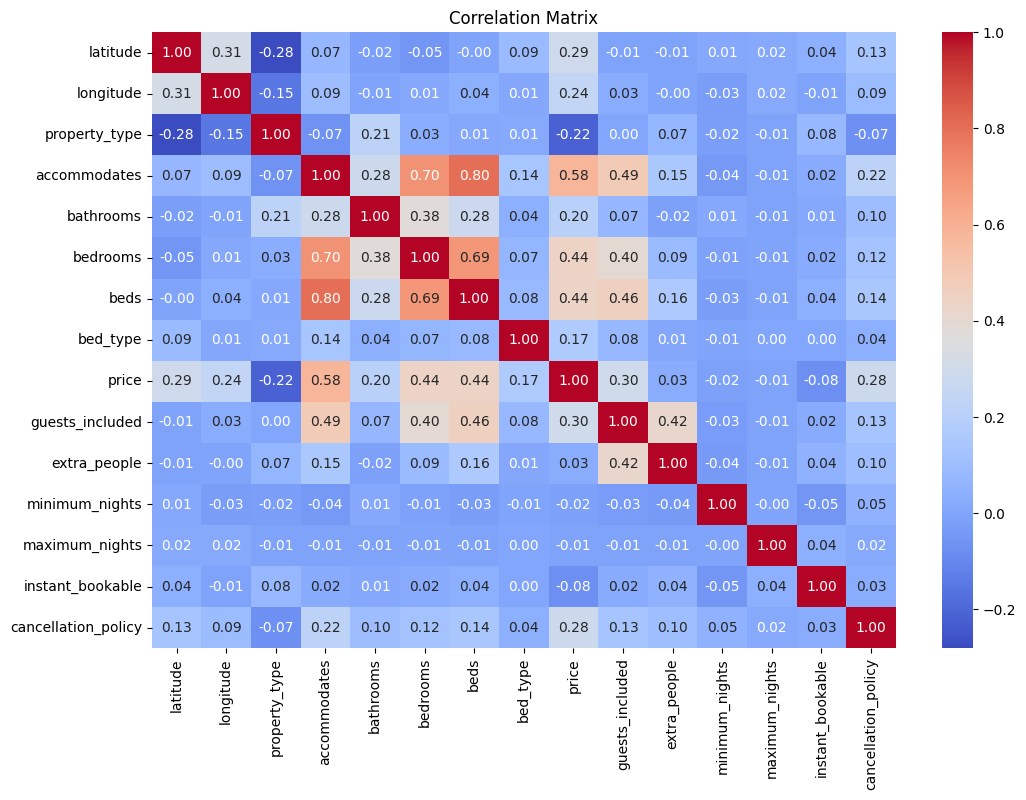

In [30]:
# Compute the correlation matirx with normalized data frame
corr_matrix = data_numerical.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

After we construct the heatmap, we can notify that there are some columns that show the high value, which mean they are highly correlated with each other. Next, we will compute the correlation with target and select the columns that have higher correlation value as our features.

In [32]:
# Make price as the target
target = "price"

# Do correlation with the target
target_corr = corr_matrix[target].drop(target)

# Print the correlated values with the target
print(target_corr)

latitude               0.291472
longitude              0.239649
property_type         -0.218540
accommodates           0.580692
bathrooms              0.201890
bedrooms               0.444128
beds                   0.438402
bed_type               0.165727
guests_included        0.295044
extra_people           0.028813
minimum_nights        -0.016663
maximum_nights        -0.005950
instant_bookable      -0.080439
cancellation_policy    0.280782
Name: price, dtype: float64


Based on the result, we will choose the features with absolute correlation value > 0.25.

In [39]:
features = target_corr[abs(target_corr) > 0.25]

# Print the selected features
print(features)

latitude               0.291472
accommodates           0.580692
bedrooms               0.444128
beds                   0.438402
guests_included        0.295044
cancellation_policy    0.280782
Name: price, dtype: float64


Before we proceed to train-test splitting, we will identify the X and y.

In [51]:
X = data_numerical[features.index]
y = data_numerical[target]

# Print the shape and first 5 value of X and y
print(X.shape)
print(y.shape)

print("-" * 70)
print(X.head())
print("-" * 70)
print(y.head())

(3362, 6)
(3362,)
----------------------------------------------------------------------
    latitude  accommodates  bedrooms  beds  guests_included  \
0  42.282619             4       2.0   3.0                1   
1  42.281390             3       1.0   2.0                1   
2  42.288820             5       2.0   2.0                4   
3  42.291723             4       2.0   2.0                1   
4  42.287641             5       2.0   3.0                5   

   cancellation_policy  
0                    1  
1                    2  
2                    2  
3                    0  
4                    1  
----------------------------------------------------------------------
0    250.0
1    100.0
2    229.0
3     93.0
4    150.0
Name: price, dtype: float64
